In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import convolve
import cv2

# Download some pictures
Let me know if this does not work!

In [2]:
import urllib.request
urllib.request.urlretrieve("https://nc.molgen.mpg.de/cloud/index.php/s/8MxXGpcCtyEQzfK/download/starry_night.jpg",
                           "starry_night.jpg")

urllib.request.urlretrieve("https://nc.molgen.mpg.de/cloud/index.php/s/z94YdCgwMbT6aiZ/download/pig_tissue.tif",
                           "pig_tissue.tif")

('pig_tissue.tif', <http.client.HTTPMessage at 0x7c4d7c72bd60>)

Load image and basic plotting

# Starry night

In [3]:
img = plt.imread('starry_night.jpg')
img.shape # Order of channels: RGB

(320, 512, 3)

In [4]:
img

array([[[250, 217, 114],
        [215, 192,  96],
        [191, 190, 108],
        ...,
        [ 22,  40,  78],
        [ 50,  74, 112],
        [ 19,  47,  86]],

       [[211, 198, 104],
        [182, 180,  95],
        [203, 218, 153],
        ...,
        [ 46,  64, 102],
        [ 96, 120, 158],
        [ 31,  59,  98]],

       [[190, 221, 143],
        [192, 228, 164],
        [ 98, 143, 112],
        ...,
        [ 27,  42,  81],
        [ 24,  46,  85],
        [108, 133, 173]],

       ...,

       [[ 28,  17,  31],
        [ 27,  19,  32],
        [ 27,  19,  32],
        ...,
        [ 26,  20,  34],
        [ 26,  18,  31],
        [ 23,  15,  28]],

       [[ 29,  16,  33],
        [ 29,  18,  34],
        [ 29,  18,  34],
        ...,
        [ 26,  20,  34],
        [ 26,  18,  31],
        [ 27,  17,  28]],

       [[ 29,  16,  33],
        [ 30,  17,  34],
        [ 29,  18,  34],
        ...,
        [ 28,  22,  34],
        [ 31,  20,  34],
        [ 32,  22,  33]]

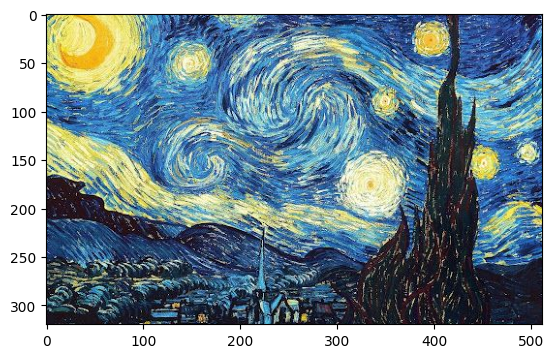

In [5]:
plt.imshow(img)
plt.show()

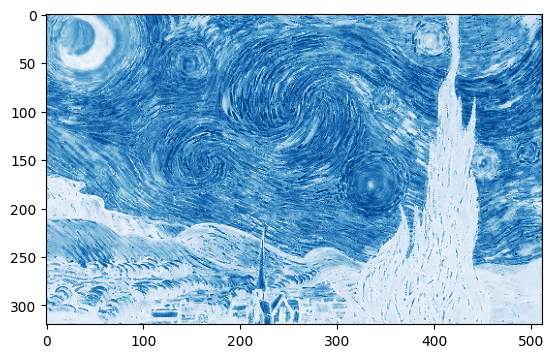

In [6]:
# Show just blue channel
plt.imshow(img[:,:,2], cmap='Blues')
plt.show()

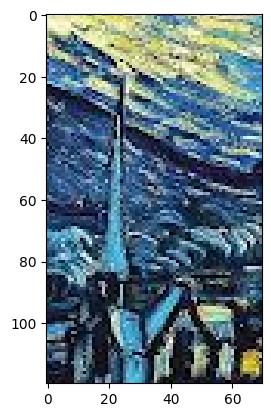

In [7]:
cropped = img[200:, 200:270, :]
plt.imshow(cropped)

In [8]:
cropped.shape

(120, 70, 3)

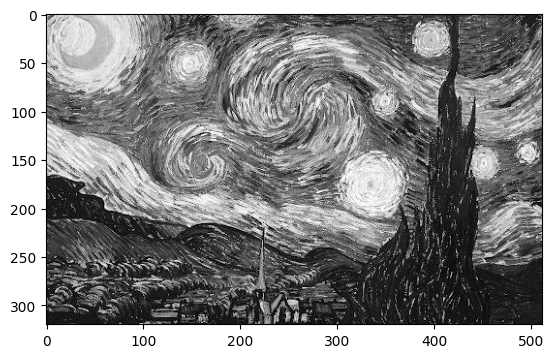

In [9]:
img = plt.imread('starry_night.jpg')

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray_img = rgb2gray(img)

plt.imshow(gray_img, cmap='gray')
plt.show()

In [10]:
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])

Ix = convolve(gray_img, sobel_x, mode='same')
Iy = convolve(gray_img, sobel_y, mode='same')

grad_magnitude = np.sqrt(np.square(Ix) + np.square(Iy))

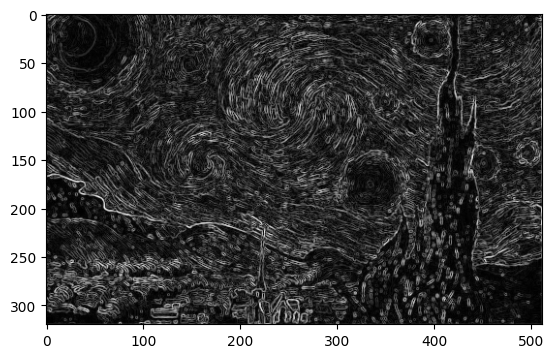

In [11]:
plt.imshow(grad_magnitude, cmap='gray')
plt.show()

## Pig Tissue

In [12]:
img = cv2.imread('pig_tissue.tif')
print(img.shape) # pretty big picture!

(1255, 1459, 3)


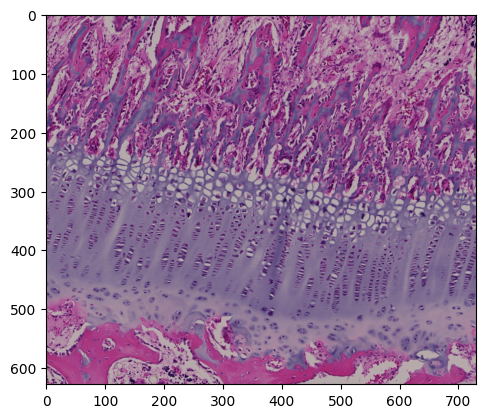

In [13]:
img = cv2.resize(img, None, fx=0.5, fy=0.5)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

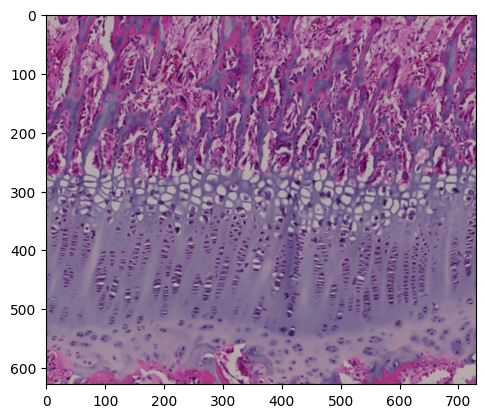

In [14]:
# find center of image
height, width = img.shape[:2]
centerX, centerY = (width // 2, height // 2)

# rotation matrix, f(center, degrees, scale)
M = cv2.getRotationMatrix2D((centerX, centerY), 8, 1.2)
rotated = cv2.warpAffine(img, M, (width, height)) # rotate image
plt.imshow(rotated)

In [15]:
row_mean = rotated.mean(axis=1) # row-wise mean

# Convert to pandas data frame
rgb = pd.DataFrame(row_mean,
                    columns = ["Red", "Green", "Blue"])

rgb["row"] = range(row_mean.shape[0])
rgb.set_index("row")
rgb_long = pd.melt(rgb, id_vars = "row", var_name="channel", value_vars=["Red", "Green", "Blue"])

<Axes: xlabel='row', ylabel='value'>

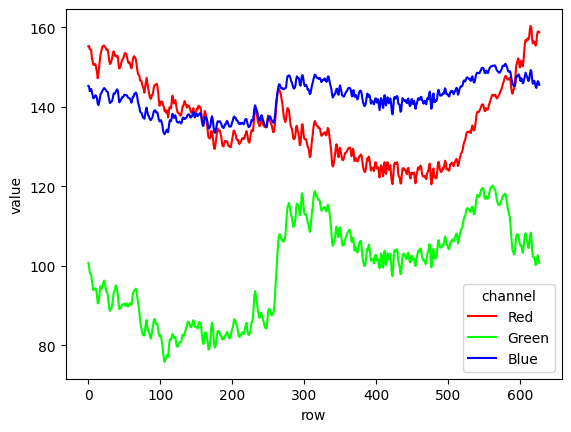

In [16]:
colors = ["#FF0000", "#00FF00", "#0000FF"]
sns.lineplot(rgb_long, x="row", y = "value", hue = "channel", palette = colors)